# ДОМАШНЕЕ ЗАДАНИЕ 1. Дескриптивный анализ данных

Астахов С.В. ИУ6-22М

## Цель работы
Приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.

## Содержание 
1. [Задание 1. Анализ индикаторов качества государственного управления](#task1)
    
    1.1 [Загрузите данные в DataFrame](#task1_1)
    
    1.2 [Отсортируйте данные по убыванию индекса DataFrame](#task1_2)
    
    1.3 [Отобразите данные по индексу WGI за 2022 год в виде горизонтального столбчатого графика (rank)](#task1_3)
    
    1.4 [Сформируйте DataFrame из исходного для региона в соответствии с Вашим вариантом](#task1_4)
    
    1.5 [Выведите данные DataFrame'a](#task1_5)
    
    1.6 [Постройте графики индекса WGI за 1996-2022 для стран своего региона (estimate)](#task1_6)
    
    1.7 [Найдите страны с наибольшим и наименьшим значением WGI Вашего варианта региона за 2022 год (estimate)](#task1_7)
    
    1.8 [Определите средние значения региона за каждый год в период с 1996 по 2022 (estimate)](#task1_8)
    
    1.9 [Постройте графики индекса WGI за 1996-2022 для стран своего региона и выделите страны с наибольшим и наименьшим значением WGI за 2022 год, а также отобразите среднее значение по региону и РФ](#task1_9)
    
    1.11 [Определите, как изменилось значение показателя rank с 1996 по 2022 (rank)](#task1_11)
    
    1.12 [Выведите таблицу для Вашего варианта (WGI - rank)](#task1_12)
    
    1.13 [Отобразите диаграмму размаха (boxplot) индекса WGI за 2022 для всех стран и для каждого региона в отдельности (на одном графике) (estimate)](#task1_13)
    
    
    
2. [Задача 2. Анализ рынка акций](#task2)

    2.1 [Загрузите данные в один dataframe из всех файлов в папке /data/stock](#task2_1)
    
    2.2 [Рассчитайте корреляционную матрицу для всех акций](#task2_2)
    
    2.3 [Отобразите корреляционную матрицу в виде диаграммы](#task2_3)
    
    2.4 [В соответствии с Вашим вариантом определите:
    акцию с максимальной положительной корреляцией (max)
    акцию с максимальной отрицательной корреляцией (min)
    акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none)](#task2_4)
    
    2.5 [Постройте диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none)](#task2_5)
    
    2.6 [Рассчитайте среднюю цену акций для каждого месяца](#task2_6)
    
    2.7 [Постройте графики для акций из пункта 4 и средней из пункта 6](#task2_7)

## Вариант

In [1]:
surname = "Астахов"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  1
Задача № 1, шаг 11 - вариант:  1
задача № 2 - вариант:  1


## Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI) <a name="task1"></a>

### 1.1 Загрузите данные в DataFrame <a name="task1_1"></a>

In [2]:
# импорт библиотек
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
# Чтение в датафрейм c 14 строки
df = pd.read_excel("./wgidataset.xlsx", sheet_name = "ControlofCorruption", header = [13,14]) # заголовок из 2 строк
df.head() # вывод первых 5 записей

Unnamed: 0_level_0 Unnamed: 1_level_0      1996                              \
   Country/Territory               Code  Estimate    StdErr NumSrc       Rank   
0              Aruba                ABW       NaN       NaN    NaN        NaN   
1            Andorra                ADO  1.318143  0.480889    1.0  87.096771   
2        Afghanistan                AFG -1.291705  0.340507    2.0   4.301075   
3             Angola                AGO -1.167702  0.262077    4.0   9.677420   
4           Anguilla                AIA       NaN       NaN    NaN        NaN   

                             1998            ...   2021                        \
       Lower      Upper  Estimate    StdErr  ... NumSrc       Rank      Lower   
0        NaN        NaN       NaN       NaN  ...    2.0  78.571426  62.857143   
1  72.043015  96.774193  1.334759  0.453149  ...    1.0  88.571426  70.000000   
2   0.000000  27.419355 -1.176012  0.324013  ...    8.0  12.380953   4.761905   
3   0.537634  27.419355 -1.180451  0.227055  ...   10.0  29.047619  19.523809   
4        NaN        NaN       NaN       NaN  ...    1.0  73.333336  50.952381   

                  2022                                                    
       Upper  Estimate    StdErr NumSrc       Rank      Lower      Upper  
0  89.047623  0.756785  0.317250    2.0  77.830185  60.849056  88.679245  
1  96.666664  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
2  20.952381 -1.183776  0.173320    8.0  12.264151   4.716981  20.283018  
3  40.476189 -0.601941  0.160003   10.0  30.660378  21.226416  43.396225  
4  89.047623  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  

[5 rows x 146 columns]

In [4]:
# Избавление от мультииндекса и переименование колонок
df = df.rename(columns={"Unnamed: 0_level_0": "C/T", "Unnamed: 1_level_0": "CD"})
new_cols = map(lambda x: x[1]+"."+str(x[0]), list(df.columns.values)) # складываем значения колоночного мультииндкеса поэлементно
df = df.droplevel(0, axis=1) # удаляем первую строку колоночного индекса
df.columns = new_cols
df = df.rename(columns={"Country/Territory.C/T": "Country/Territory", "Code.CD": "Code"})
df.head()

,Country/Territory,Code,Estimate.1996,StdErr.1996,NumSrc.1996,Rank.1996,Lower.1996,Upper.1996,Estimate.1998,StdErr.1998,...,NumSrc.2021,Rank.2021,Lower.2021,Upper.2021,Estimate.2022,StdErr.2022,NumSrc.2022,Rank.2022,Lower.2022,Upper.2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,78.571426,62.857143,89.047623,0.756785,0.317250,2.0,77.830185,60.849056,88.679245
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1.334759,0.453149,...,1.0,88.571426,70.000000,96.666664,1.270204,0.463415,1.0,88.679245,68.396225,97.169815
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,-1.180451,0.227055,...,10.0,29.047619,19.523809,40.476189,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,73.333336,50.952381,89.047623,1.270204,0.463415,1.0,88.679245,68.396225,97.169815


### 1.2 Отсортируйте данные по убыванию индекса DataFrame <a name="task1_2"></a>

In [5]:
df_sort_desc = df.iloc[::-1] #сортировка по убыванию индекса
df_sort_desc #вывод

,Country/Territory,Code,Estimate.1996,StdErr.1996,NumSrc.1996,Rank.1996,Lower.1996,Upper.1996,Estimate.1998,StdErr.1998,...,NumSrc.2021,Rank.2021,Lower.2021,Upper.2021,Estimate.2022,StdErr.2022,NumSrc.2022,Rank.2022,Lower.2022,Upper.2022
213,Zimbabwe,ZWE,-0.278847,0.244907,5.0,47.849461,30.645161,60.752689,-0.504802,0.198134,...,12.0,10.000000,4.285714,17.619047,-1.255139,0.151262,12.0,8.490566,4.245283,17.924528
212,Zambia,ZMB,-0.840641,0.262077,4.0,24.731182,5.913979,41.397850,-0.853156,0.227055,...,12.0,25.714285,17.619047,33.809525,-0.529200,0.152557,12.0,34.433964,23.584906,45.754719
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.315914,3.0,0.000000,0.000000,12.365591,-1.416679,0.310343,...,11.0,4.285714,0.000000,6.666667,-1.544474,0.149016,12.0,3.301887,0.471698,7.075472
210,South Africa,ZAF,0.732927,0.210325,6.0,76.344086,66.129036,81.182793,0.638809,0.188628,...,11.0,53.809525,46.190475,60.000000,-0.319765,0.157883,11.0,44.811321,31.603773,52.358490
209,Serbia,SRB,-1.140072,0.262077,4.0,11.827957,0.537634,29.032259,-1.195605,0.191027,...,9.0,35.714287,26.190475,48.095238,-0.456188,0.158030,9.0,35.377357,24.528301,48.113209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,73.333336,50.952381,89.047623,1.270204,0.463415,1.0,88.679245,68.396225,97.169815
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,-1.180451,0.227055,...,10.0,29.047619,19.523809,40.476189,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1.334759,0.453149,...,1.0,88.571426,70.000000,96.666664,1.270204,0.463415,1.0,88.679245,68.396225,97.169815


### 1.3 Отобразите данные по индексу WGI за 2022 год в виде горизонтального столбчатого графика (rank) <a name="task1_3"></a>

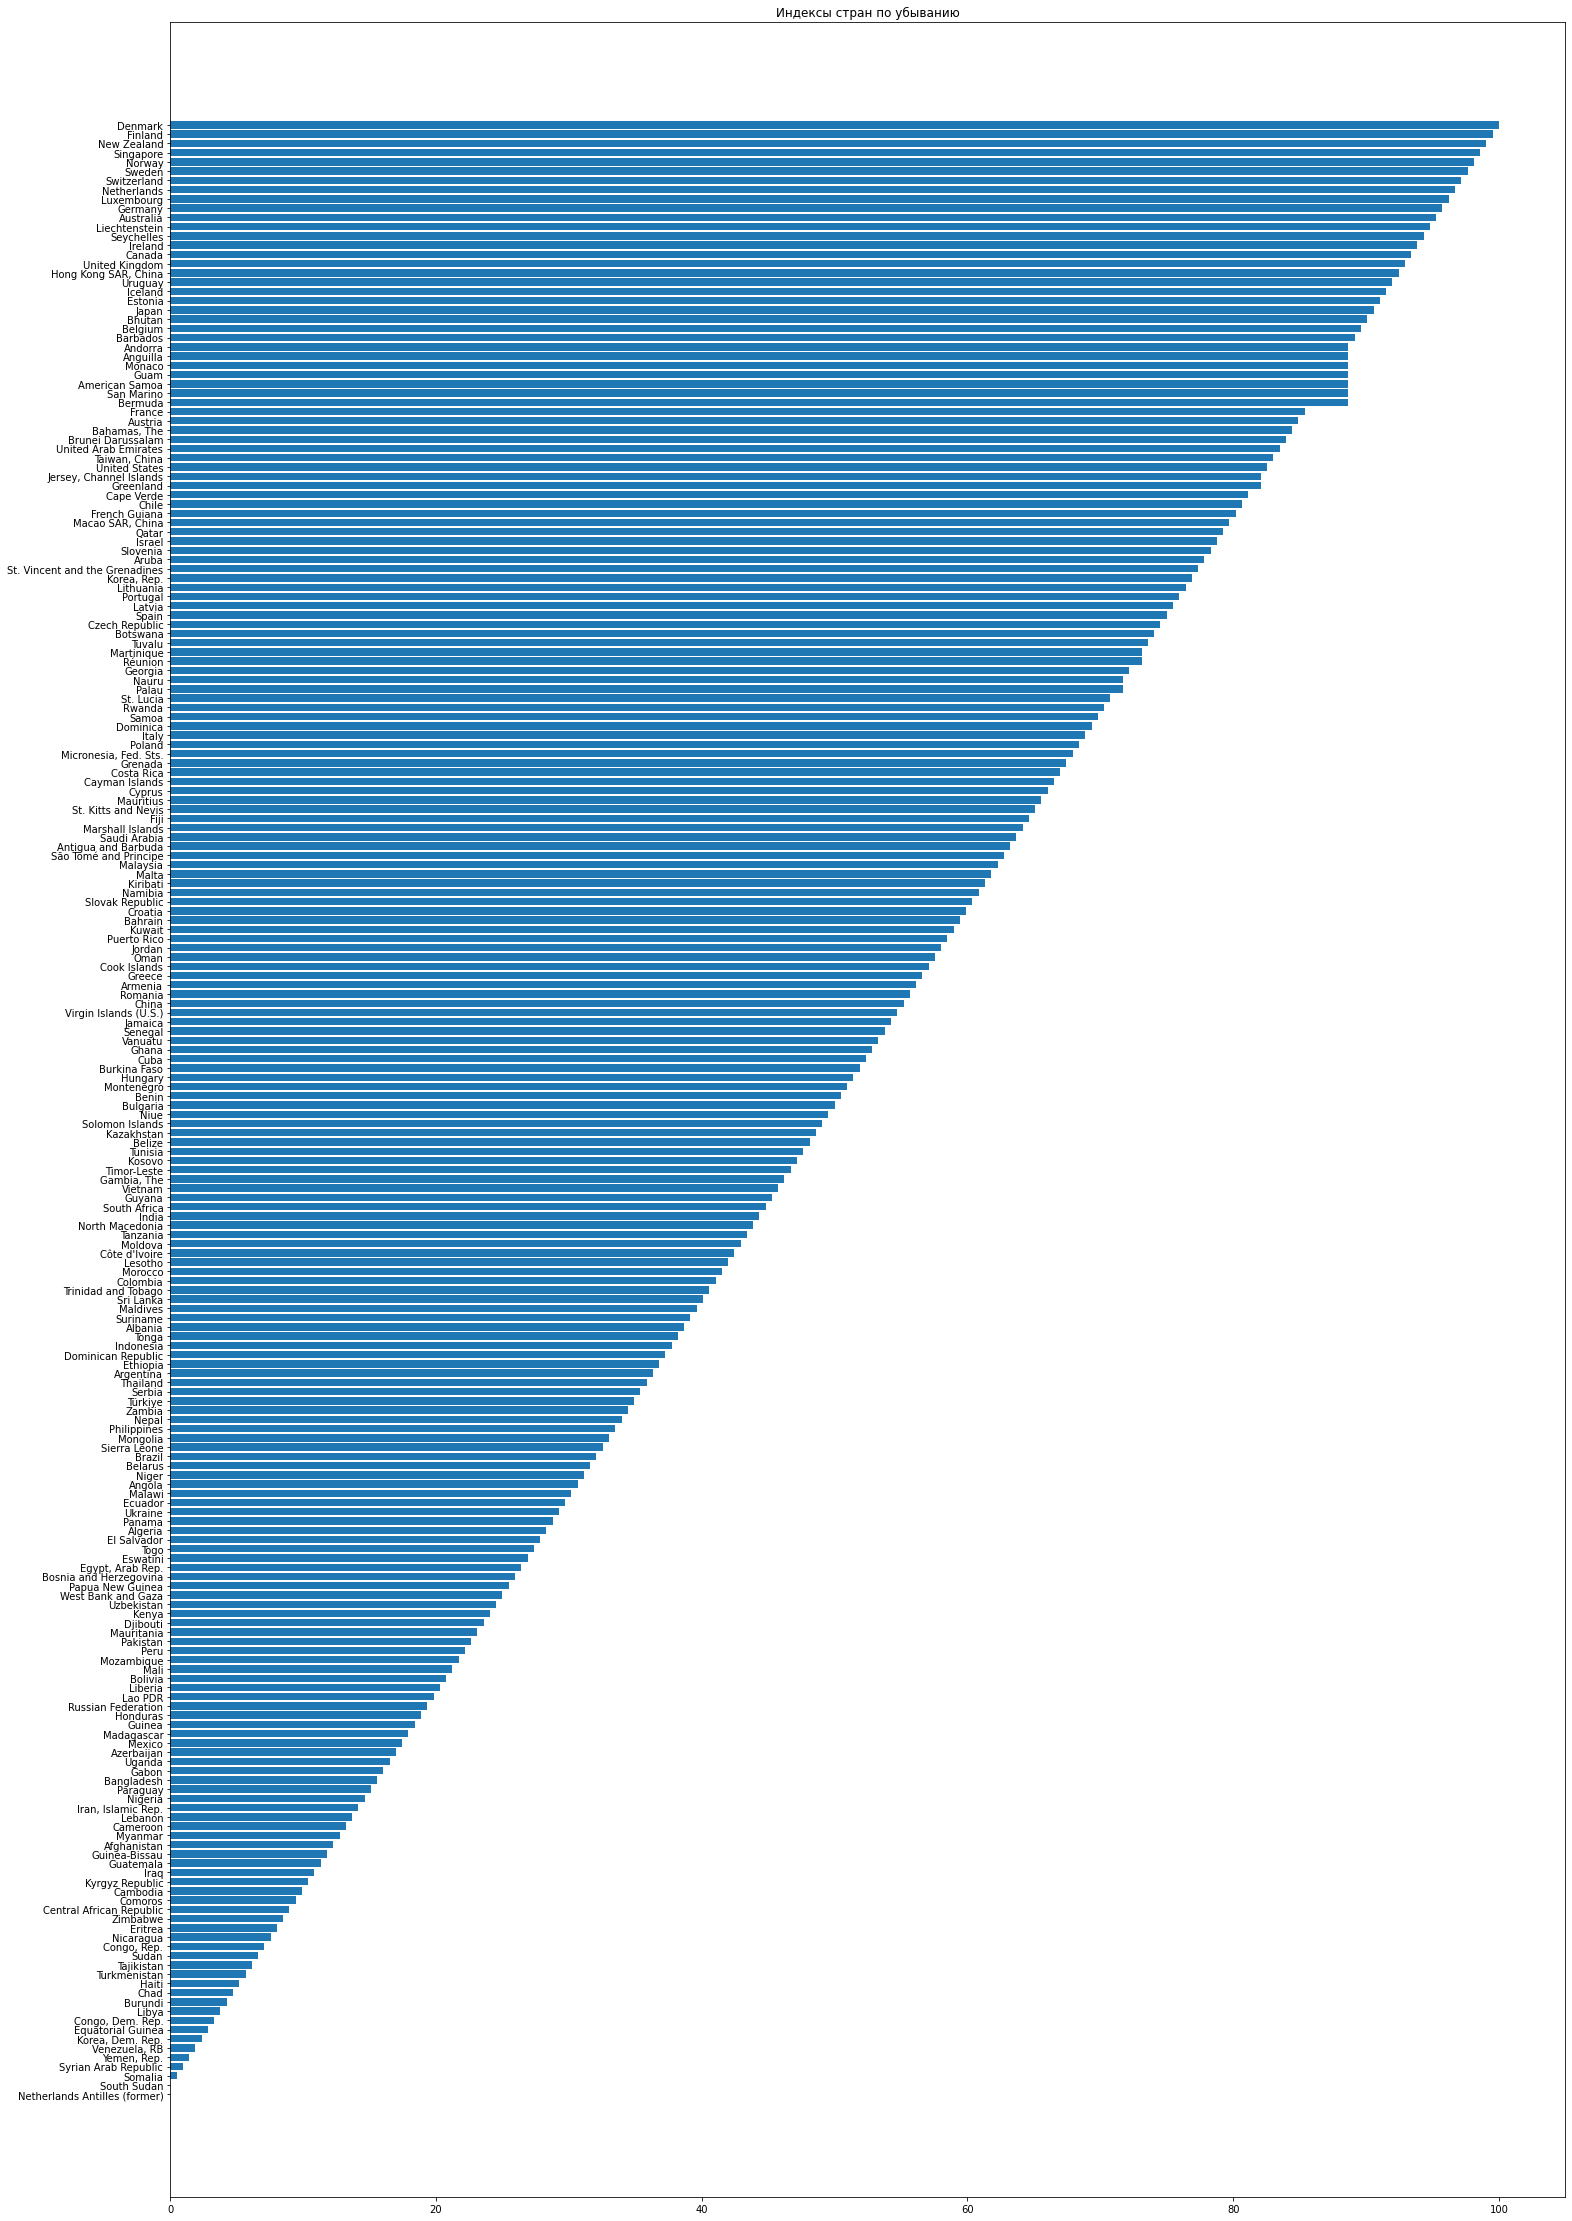

In [6]:
df_sort_desс_fillna = df_sort_desc.copy() # 0 вместо NaN
df_sort_desс_fillna["Rank.2022"] = df_sort_desс_fillna["Rank.2022"].fillna(0)
#сортировка данных по столбцу Rank за 2022-ый год 
dfSort = df_sort_desс_fillna.sort_values("Rank.2022", ascending=True) 
plt.figure(figsize=(25, 40)) #размер графика
plt.title('Индексы стран по убыванию')
plt.barh(dfSort["Country/Territory"], dfSort['Rank.2022']) #формирование графика
plt.show() #Отображение

### 1.4 Сформируйте DataFrame из исходного для региона в соответствии с Вашим вариантом <a name="task1_4"></a>

In [7]:
# Чтение файла с регионами в датафрейм
df_reg = pd.read_excel("./regions.xlsx") 
df_reg.head(10)

,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME
5,Armenia,ARM,ECA
6,Australia,AUS,AP
7,Austria,AUT,WE/EU
8,Azerbaijan,AZE,ECA
9,Bahamas,BHS,AME


In [8]:
# Join df с регионами и со странами
merged_df = pd.merge(df_reg, df, on='Code')
sort_for_reg = merged_df.groupby("Region")
sort_for_reg
#создание датафрейма по региону AP
df_region = sort_for_reg.get_group("AP")
df_region = df_region.drop('Country/Territory', axis=1, inplace=False) # Дублируется столбцом "Country"
df_region = df_region.set_index("Country") # выставление столбца Country индексом

### 1.5 Выведите данные DataFrame'a <a name="task1_5"></a>

In [9]:
df_region

,Code,Region,Estimate.1996,StdErr.1996,NumSrc.1996,Rank.1996,Lower.1996,Upper.1996,Estimate.1998,StdErr.1998,...,NumSrc.2021,Rank.2021,Lower.2021,Upper.2021,Estimate.2022,StdErr.2022,NumSrc.2022,Rank.2022,Lower.2022,Upper.2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,AP,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
Australia,AUS,AP,1.877356,0.210325,6.0,93.548386,90.322578,99.462364,1.798130,0.188628,...,9.0,94.761902,89.047623,96.666664,1.764490,0.162881,9.0,95.283020,89.622643,97.169815
Bangladesh,BGD,AP,-0.969682,0.262077,4.0,17.741936,2.688172,34.946236,-0.773011,0.227055,...,12.0,18.095238,10.952381,26.190475,-1.075527,0.153577,12.0,15.566038,7.075472,21.698112
Bhutan,BTN,AP,0.942838,0.340507,2.0,81.182793,66.129036,90.322578,0.883641,0.324013,...,7.0,90.476189,84.285713,95.714287,1.514259,0.200353,7.0,90.094337,83.962265,95.754715
Cambodia,KHM,AP,-1.019842,0.275614,3.0,16.129032,2.150538,32.795700,-0.988312,0.232248,...,11.0,11.428572,4.761905,18.571428,-1.241499,0.158586,11.0,9.905661,4.245283,18.867924
China,CHN,AP,-0.271190,0.188622,7.0,48.387096,32.258064,58.602150,-0.353955,0.172851,...,10.0,56.190475,48.095238,62.380951,0.015970,0.153877,10.0,55.188679,48.113209,62.264153
Fiji,FJI,AP,0.659303,0.340507,2.0,73.655914,59.677418,84.408600,0.663798,0.324013,...,4.0,65.714287,54.285713,80.476189,0.388570,0.290792,5.0,64.622643,51.415092,79.245285
Hong Kong,HKG,AP,1.444894,0.204951,6.0,89.784943,81.182793,93.010750,1.303382,0.186292,...,9.0,94.285713,89.047623,96.190475,1.610646,0.162881,9.0,92.452827,89.150940,95.754715
India,IND,AP,-0.381090,0.188622,7.0,43.010754,29.569893,53.763439,-0.258727,0.172851,...,12.0,45.238094,31.904762,50.476189,-0.321811,0.147102,12.0,44.339622,32.547169,51.886791


### 1.6 Постройте графики индекса WGI за 1996-2022 для стран своего региона (estimate) <a name="task1_6"></a>

In [10]:
WGI = df_region.filter(regex='Estimate|Country')#Фильтрация по Estimate|Country 
# WGI.columns = map(lambda x: x.split(".")[1], list(WGI.columns.values)) # Убрать слово Estimate
WGI.head()

,Estimate.1996,Estimate.1998,Estimate.2000,Estimate.2002,Estimate.2003,Estimate.2004,Estimate.2005,Estimate.2006,Estimate.2007,Estimate.2008,...,Estimate.2013,Estimate.2014,Estimate.2015,Estimate.2016,Estimate.2017,Estimate.2018,Estimate.2019,Estimate.2020,Estimate.2021,Estimate.2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-1.291705,-1.176012,-1.271724,-1.251137,-1.344180,-1.350647,-1.447252,-1.446292,-1.613251,-1.672096,...,-1.445908,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776
Australia,1.877356,1.798130,1.862088,1.761436,1.895287,2.005869,1.942668,1.950813,2.000873,2.027343,...,1.777870,1.849465,1.841354,1.772004,1.752321,1.767378,1.788173,1.632956,1.707646,1.764490
Bangladesh,-0.969682,-0.773011,-1.212083,-1.449087,-1.541721,-1.597115,-1.406467,-1.442983,-1.063240,-1.046788,...,-0.893825,-0.892130,-0.844026,-0.886878,-0.858939,-0.926947,-1.016994,-1.003677,-0.985861,-1.075527
Bhutan,0.942838,0.883641,0.574340,0.449922,1.087011,0.893403,0.871917,0.854817,0.928756,0.912390,...,0.912420,1.306129,0.989678,1.091020,1.529063,1.590518,1.572266,1.618237,1.507121,1.514259
Cambodia,-1.019842,-0.988312,-0.967183,-0.990784,-0.989836,-1.058346,-1.223740,-1.260386,-1.151690,-1.241711,...,-1.063722,-1.146750,-1.153124,-1.301331,-1.317362,-1.356795,-1.323166,-1.271122,-1.197489,-1.241499


In [11]:
WGI = WGI.T #транспонирование
WGI.head()

Country,Afghanistan,Australia,Bangladesh,Bhutan,Cambodia,China,Fiji,Hong Kong,India,Indonesia,...,Pakistan,Papua New Guinea,Philippines,Singapore,Solomon Islands,Sri Lanka,Taiwan,Thailand,Vanuatu,Vietnam
Estimate.1996,-1.291705,1.877356,-0.969682,0.942838,-1.019842,-0.271190,0.659303,1.444894,-0.381090,-0.864106,...,-1.220030,-0.433467,-0.358872,2.107434,0.340782,-0.056539,0.580821,-0.361192,0.216309,-0.489799
Estimate.1998,-1.176012,1.798130,-0.773011,0.883641,-0.988312,-0.353955,0.663798,1.303382,-0.258727,-1.160077,...,-1.080915,-0.698878,-0.381950,2.057286,0.361923,-0.083365,0.583798,-0.141036,0.238910,-0.491154
Estimate.2000,-1.271724,1.862088,-1.212083,0.574340,-0.967183,-0.208549,0.630552,1.292820,-0.403302,-0.908694,...,-0.894910,-0.786501,-0.527594,2.139873,0.177562,-0.199229,0.696333,-0.230174,0.227800,-0.584863
Estimate.2002,-1.251137,1.761436,-1.449087,0.449922,-0.990784,-0.557898,0.610876,1.666942,-0.555382,-1.137303,...,-0.955986,-0.947748,-0.538532,2.262734,0.182450,-0.216593,0.619227,-0.338848,0.230140,-0.560991
Estimate.2003,-1.344180,1.895287,-1.541721,1.087011,-0.989836,-0.395265,0.276082,1.800160,-0.456321,-0.979824,...,-0.804457,-0.813448,-0.635372,2.169168,0.214312,-0.272020,0.814145,-0.196024,0.262945,-0.490873


<AxesSubplot:title={'center':'WGI за 1996-2022 Asia Pacific estimate'}>

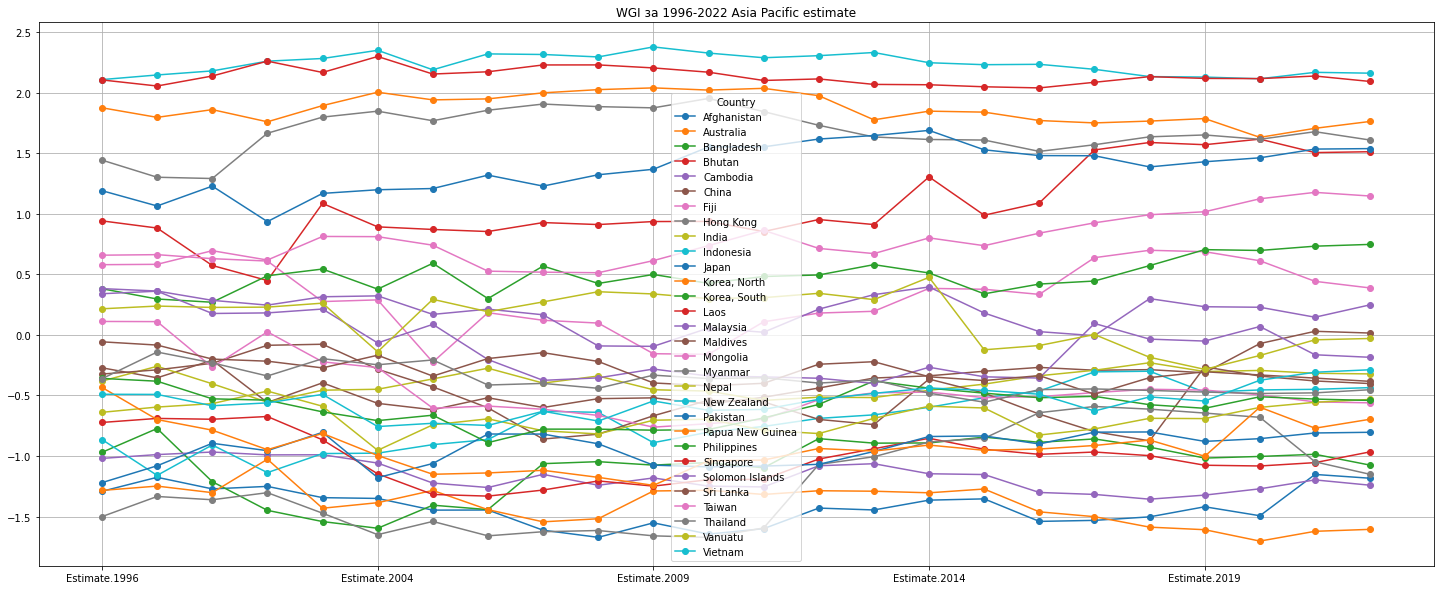

In [12]:
WGI.plot(grid=1,
         figsize=(25,10), 
         title='WGI за 1996-2022 Asia Pacific estimate', 
         marker='o', 
         legend = True)

### 1.7 Найдите страны с наибольшим и наименьшим значением WGI Вашего варианта региона за 2022 год (estimate) <a name="task1_7"></a>

In [13]:
WGI = WGI.T
#вывод наименьшего
min_W = WGI["Estimate.2022"].idxmin()
min_W

'Korea, North'

In [14]:
#вывод наибольшего
max_W = WGI["Estimate.2022"].idxmax()
max_W

'New Zealand'

### 1.8 Определите средние значения региона за каждый год в период с 1996 по 2022 (estimate) <a name="task1_8"></a>

In [15]:
#вывод среднего значения за каждый период
mean = WGI.mean()
mean.name = "mean"
mean

Estimate.1996    0.005390
Estimate.1998    0.004409
Estimate.2000   -0.035114
Estimate.2002   -0.043584
Estimate.2003   -0.024761
Estimate.2004   -0.117873
Estimate.2005   -0.141014
Estimate.2006   -0.154418
Estimate.2007   -0.139037
Estimate.2008   -0.156720
Estimate.2009   -0.154840
Estimate.2010   -0.140798
Estimate.2011   -0.131607
Estimate.2012   -0.063054
Estimate.2013   -0.046824
Estimate.2014    0.012366
Estimate.2015   -0.049325
Estimate.2016   -0.073050
Estimate.2017   -0.025685
Estimate.2018   -0.012606
Estimate.2019   -0.013031
Estimate.2020    0.016584
Estimate.2021    0.016733
Estimate.2022    0.012814
Name: mean, dtype: float64

### 1.9 Постройте графики индекса WGI за 1996-2022 для стран своего региона и выделите страны с наибольшим и наименьшим значением WGI за 2022 год, а также отобразите среднее значение по региону и РФ <a name="task1_9"></a>

In [16]:
WGI = WGI.T

<AxesSubplot:title={'center':'mean'}>

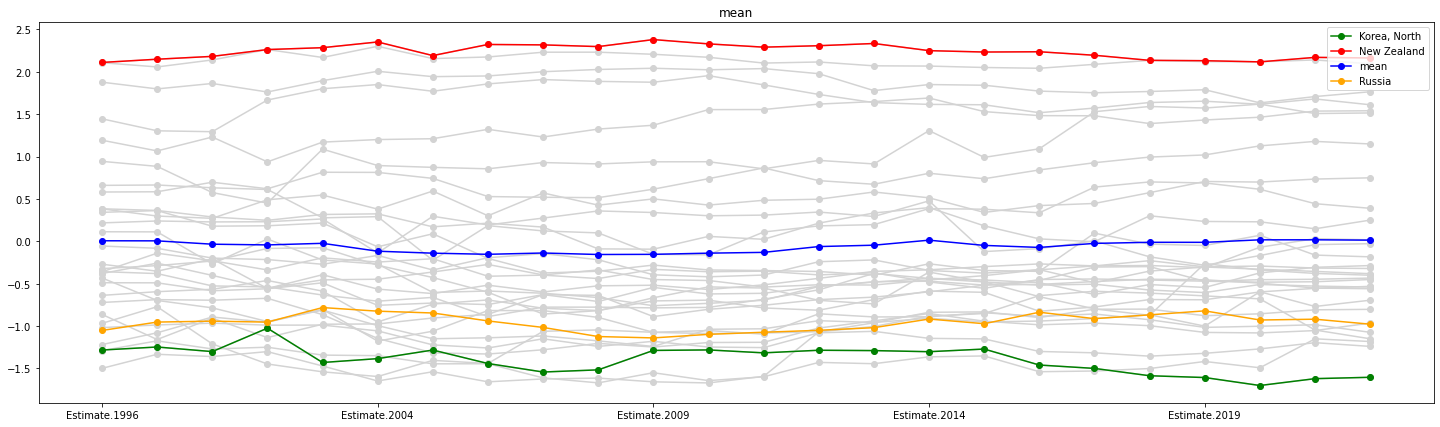

In [17]:
#выод графика индекса для всех стран региона AP
WGI.plot(color='lightgrey', grid=1, figsize=(25,7), 
         title='WGA за 1996-2021 MENA estimate', marker='o', legend = False)
WGI[min_W].plot(color='green', marker='o', legend = True)#вывод графика по минимальному значению
WGI[max_W].plot(color='red', marker='o', legend = True)#вывод графика по максимальному значению
mean.plot(title="mean", color='blue', marker='o', legend = True)#вывод графика по среднему значению 
# #Вывод графика по России
df_russia = merged_df[merged_df["Country"].str.contains('Russ')].set_index('Country')
df_russia.filter(regex='Estimate').T["Russia"].plot(color='orange',marker='o', legend = True)

## 1.11 Определите, как изменилось значение показателя rank с 1996 по 2022 (rank) <a name="task1_11"></a>

In [18]:
df_rank_change = pd.concat([df_region.filter(regex='Rank'), df_russia.filter(regex='Rank')], axis=0)
df_rank_change.head()

,Rank.1996,Rank.1998,Rank.2000,Rank.2002,Rank.2003,Rank.2004,Rank.2005,Rank.2006,Rank.2007,Rank.2008,...,Rank.2013,Rank.2014,Rank.2015,Rank.2016,Rank.2017,Rank.2018,Rank.2019,Rank.2020,Rank.2021,Rank.2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.301075,8.021390,4.787234,4.761905,4.761905,6.403941,1.463415,1.951220,0.970874,0.485437,...,0.947867,5.288462,5.714286,3.809524,3.809524,4.761905,5.714286,4.761905,12.380953,12.264151
Australia,93.548386,92.513367,93.617020,92.063492,93.650795,96.551727,95.609756,95.121948,95.631065,96.116508,...,93.838860,95.192307,94.761902,93.333336,92.857140,92.380951,94.761902,93.809525,94.761902,95.283020
Bangladesh,17.741936,28.877005,6.914894,1.587302,0.529101,0.985222,2.926829,2.926829,13.592233,15.048544,...,21.327015,18.750000,21.904762,18.571428,18.571428,17.142857,16.190475,17.142857,18.095238,15.566038
Bhutan,81.182793,81.283424,71.276596,70.899467,82.010582,80.788177,79.024391,77.560974,78.155342,78.640778,...,79.146919,88.461540,80.952377,81.428574,90.952377,91.428574,91.428574,93.333336,90.476189,90.094337
Cambodia,16.129032,19.251337,18.085106,17.460318,14.285714,14.285714,10.243902,7.317073,10.679611,5.339806,...,12.796208,11.538462,11.428572,9.047619,9.047619,8.571428,9.523809,10.476191,11.428572,9.905661


In [19]:
# вывод процена изменения относительно 1996-го года и 2022-го
# изменение в долях от единицы
procent_change = df_rank_change.filter(items=['Rank.1996','Rank.2022']).copy().pct_change(axis=1)['Rank.2022']
procent_change_readable = procent_change.map(lambda x: "{:.2f}%".format(x*100)) # перевод из долей в проценты
procent_change_concat = pd.concat([df_rank_change[['Rank.1996','Rank.2022']], procent_change, procent_change_readable], axis=1)
procent_change_concat.columns = ['Rank.1996','Rank.2022', "Change.relative", "Change.percent"]
procent_change_concat

,Rank.1996,Rank.2022,Change.relative,Change.percent
Country,,,,
Afghanistan,4.301075,12.264151,1.851415,185.14%
Australia,93.548386,95.283020,0.018543,1.85%
Bangladesh,17.741936,15.566038,-0.122641,-12.26%
Bhutan,81.182793,90.094337,0.109771,10.98%
Cambodia,16.129032,9.905661,-0.385849,-38.58%
China,48.387096,55.188679,0.140566,14.06%
Fiji,73.655914,64.622643,-0.122641,-12.26%
Hong Kong,89.784943,92.452827,0.029714,2.97%
India,43.010754,44.339622,0.030896,3.09%


### 1.12 Выведите таблицу для Вашего варианта (WGI - rank) <a name="task1_12"></a>

In [20]:
# вся таблица берется из датафрейма выше по найденным ранее ключам
#создание 0-го столбца таблицы
Rows = ['mean_2022', 'max_2022', 'min_2022', 'Russia_2022']
#создание 0-ой коллонки таблицы
Cols = ['Регион', 'Страна', 'WGI 1996', 'WGI 2022', 'Изменение']
Tabl_proc  = pd.DataFrame(index=Rows,columns=Cols)

In [21]:
#создание первого столбца таблицы
Tabl_proc.loc['mean_2022', 'Регион'] = "AP" # из вариантов
Tabl_proc.loc['max_2022', 'Регион'] = "AP" # из вариантов
Tabl_proc.loc['min_2022', 'Регион'] = "AP" # из вариантов
# Получаем название региона для России
Tabl_proc.loc['Russia_2022', 'Регион'] = list(merged_df[merged_df["Country"].str.contains('Russ')]["Region"])[0]

In [22]:
#создание второго столбца таблицы
Tabl_proc.loc['mean_2022', 'Страна'] = "-"
Tabl_proc.loc['max_2022', 'Страна'] = max_W
Tabl_proc.loc['min_2022', 'Страна'] = min_W
Tabl_proc.loc['Russia_2022', 'Страна'] = "Russian Federation"

In [23]:
#создание третьего столбца таблицы
Tabl_proc.loc['mean_2022', 'WGI 1996'] = "{:.2f}".format(procent_change_concat["Rank.1996"].mean())
Tabl_proc.loc['max_2022', 'WGI 1996'] = "{:.2f}".format(procent_change_concat["Rank.1996"][max_W])
Tabl_proc.loc['min_2022', 'WGI 1996'] = "{:.2f}".format(procent_change_concat["Rank.1996"][min_W])
Tabl_proc.loc['Russia_2022', 'WGI 1996'] = "{:.2f}".format(procent_change_concat["Rank.1996"]["Russia"])

In [24]:
#создание четвертого столбца таблицы
Tabl_proc.loc['mean_2022', 'WGI 2022'] = "{:.2f}".format(procent_change_concat["Rank.2022"].mean())
Tabl_proc.loc['max_2022', 'WGI 2022'] = "{:.2f}".format(procent_change_concat["Rank.2022"][max_W])
Tabl_proc.loc['min_2022', 'WGI 2022'] = "{:.2f}".format(procent_change_concat["Rank.2022"][min_W])
Tabl_proc.loc['Russia_2022', 'WGI 2022'] = "{:.2f}".format(procent_change_concat["Rank.2022"]["Russia"])

In [25]:
#создание пятого столбца таблицы
Tabl_proc.loc['mean_2022', 'Изменение'] = "{:.2f}%".format(procent_change_concat["Change.relative"].mean()*100)
Tabl_proc.loc['max_2022', 'Изменение'] = procent_change_concat["Change.percent"][max_W]
Tabl_proc.loc['min_2022', 'Изменение'] = procent_change_concat["Change.percent"][min_W]
Tabl_proc.loc['Russia_2022', 'Изменение'] = procent_change_concat["Change.percent"]["Russia"]
Tabl_proc

,Регион,Страна,WGI 1996,WGI 2022,Изменение
mean_2022,AP,-,49.06,48.20,29.62%
max_2022,AP,New Zealand,97.85,99.06,1.23%
min_2022,AP,"Korea, North",4.84,2.36,-51.26%
Russia_2022,ECA,Russian Federation,15.05,19.34,28.47%


### 1.13 Отобразите диаграмму размаха (boxplot) индекса WGI за 2022 для всех стран и для каждого региона в отдельности (на одном графике) (estimate) <a name="task1_13"></a>

In [26]:
# получаем спиcок регионов
regions = list(merged_df["Region"].drop_duplicates())
regions

['AP', 'ECA', 'MENA', 'SSA', 'AME', 'WE/EU']

In [27]:
merged_df.head()

,Country,Code,Region,Country/Territory,Estimate.1996,StdErr.1996,NumSrc.1996,Rank.1996,Lower.1996,Upper.1996,...,NumSrc.2021,Rank.2021,Lower.2021,Upper.2021,Estimate.2022,StdErr.2022,NumSrc.2022,Rank.2022,Lower.2022,Upper.2022
0,Afghanistan,AFG,AP,Afghanistan,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
1,Albania,ALB,ECA,Albania,-0.893903,0.315914,3.0,19.354839,2.688172,43.010754,...,9.0,31.904762,21.428572,45.238094,-0.407876,0.158030,9.0,38.679245,26.886793,50.000000
2,Algeria,DZA,MENA,Algeria,-0.566741,0.262077,4.0,33.333332,16.666666,52.688171,...,7.0,29.523809,19.047619,43.333332,-0.637930,0.176952,7.0,28.301888,19.811321,42.452831
3,Angola,AGO,SSA,Angola,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,...,10.0,29.047619,19.523809,40.476189,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225
4,Argentina,ARG,AME,Argentina,-0.101317,0.210325,6.0,53.763439,38.709679,62.903225,...,12.0,38.095238,27.619047,49.523811,-0.447030,0.158160,11.0,36.320755,24.528301,48.113209


In [28]:
df_box_all_regions = merged_df.filter(regex='Estimate.2022|Country') \
    .set_index('Country/Territory').rename(columns={'Estimate.2022': 'all'})
dfs = [df_box_all_regions]
# группировка данных по регионам
for region in regions:
    df_tmp = merged_df[merged_df.Region==region]
    df_tmp_box = df_tmp.filter(regex='Estimate.2022|Country').set_index('Country') \
        .rename(columns={'Estimate.2022': region}) \
        .drop('Country/Territory', axis=1, inplace=False)
    dfs.append(df_tmp_box)
df_box = pd.concat(dfs, sort = True)

<AxesSubplot:>

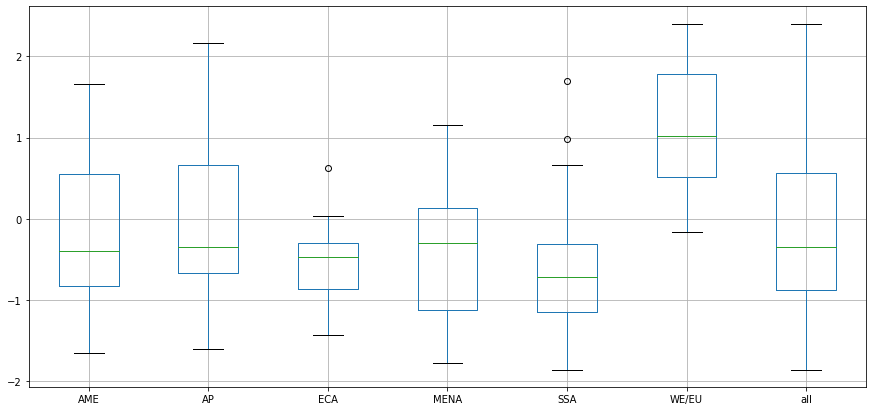

In [29]:
plt.figure(figsize=(15,7))
df_box.boxplot()

## Задача 2. Анализ рынка акций <a name="task2"></a>

### 2.1 Загрузите данные в один dataframe из всех файлов в папке /data/stock. Все файлы имеют одинаковую структуру, в том числе наименование столбцов. В качестве значений индекса dataframe'а необходимо указать значения столбца "Date". Название столбцов должные соответствовать названию акций (имя файла без .csv), а их значения - значениям цены закрытия (столбец "Close" в файлах .csv) <a name="task2_1"></a>

In [30]:
#Подключение всех файлов
import glob
glob_file = glob.glob('./stock/*.csv')

#Объединение всех файлов
df_tmp = {}
for file in glob_file: #цикл по всем файлам
    end = file.find('.csv')
    data = pd.read_csv(file, index_col='Date') #считывание данных
    data_name = file.split("/")[-1].split(".")[0] #считывание названия
    df_tmp[data_name] = data['Close'] # цена закрытия   
df2 = pd.concat(df_tmp, axis=1, sort = True)  
df2.head()

,AAPL,SPOT,TSLA,HPQ,NFLX,CSCO,UBER,EBAY,ORCL,MSFT,...,META,DBX,GOOGL,TCOM,GTLB,SHOP,INTC,PINS,AMZN,ADBE
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,174.779999,196.259995,312.239990,36.730000,427.140015,55.669998,37.400002,60.070000,81.160004,310.980011,...,313.260010,24.750000,135.303497,26.610001,64.010002,NaN,48.820000,29.559999,149.573502,534.299988
2022-02-01,165.119995,156.190002,290.143341,34.360001,394.519989,55.770000,36.029999,54.590000,75.970001,298.790009,...,211.029999,22.690001,135.057007,25.820000,58.270000,NaN,47.700001,26.750000,153.563004,467.679993
2022-03-01,174.610001,151.020004,359.200012,36.299999,374.589996,55.759998,35.680000,57.259998,82.730003,308.309998,...,222.360001,23.250000,139.067505,23.120001,54.450001,NaN,49.560001,24.610001,162.997498,455.619995
2022-04-01,157.649994,101.650002,290.253326,36.630001,190.360001,48.980000,31.480000,51.919998,73.400002,277.519989,...,200.470001,21.750000,114.109497,23.650000,47.930000,NaN,43.590000,20.520000,124.281502,395.950012
2022-05-01,148.839996,112.769997,252.753326,38.840000,197.440002,45.049999,23.200001,48.669998,71.919998,271.869995,...,193.639999,20.840000,113.762001,22.059999,38.939999,NaN,44.419998,19.650000,120.209503,416.480011


### 2.2 Рассчитайте корреляционную матрицу для всех акций <a name="task2_2"></a>

In [31]:
# корреляционная матрица
df2.corr()

,AAPL,SPOT,TSLA,HPQ,NFLX,CSCO,UBER,EBAY,ORCL,MSFT,...,META,DBX,GOOGL,TCOM,GTLB,SHOP,INTC,PINS,AMZN,ADBE
AAPL,1.000000,0.687415,0.248385,0.067074,0.701937,0.589552,0.661323,0.115591,0.769309,0.790691,...,0.705358,0.740429,0.806847,0.439363,0.282373,0.465147,0.507251,0.640294,0.665715,0.833129
SPOT,0.687415,1.000000,-0.092332,0.005774,0.920771,0.424007,0.933308,0.296858,0.763100,0.949380,...,0.973401,0.525305,0.821587,0.640120,0.540113,0.737909,0.645555,0.842858,0.875779,0.863827
TSLA,0.248385,-0.092332,1.000000,0.568231,-0.251616,0.253808,-0.221155,0.434899,-0.310021,-0.117639,...,-0.144519,0.037233,0.326662,-0.586854,0.260908,0.025575,0.425236,-0.253055,0.302321,0.071508
HPQ,0.067074,0.005774,0.568231,1.000000,-0.203337,0.214262,-0.180970,0.744560,-0.260316,-0.034581,...,-0.035611,-0.177013,0.263251,-0.443806,0.094128,0.436406,0.591406,-0.285950,0.235247,0.081518
NFLX,0.701937,0.920771,-0.251616,-0.203337,1.000000,0.497727,0.937042,0.138580,0.859397,0.900263,...,0.897908,0.635239,0.717756,0.766681,0.452625,0.852517,0.447049,0.930638,0.735466,0.821314
CSCO,0.589552,0.424007,0.253808,0.214262,0.497727,1.000000,0.326346,0.494938,0.463955,0.391476,...,0.374998,0.496982,0.600025,0.257188,0.068856,-0.144612,0.420854,0.384233,0.404820,0.554172
UBER,0.661323,0.933308,-0.221155,-0.180970,0.937042,0.326346,1.000000,0.085736,0.832075,0.939538,...,0.954444,0.595928,0.737311,0.754442,0.521399,0.836565,0.512572,0.907751,0.796897,0.834611
EBAY,0.115591,0.296858,0.434899,0.744560,0.138580,0.494938,0.085736,1.000000,-0.070414,0.127010,...,0.190361,-0.157363,0.375794,-0.149330,0.251066,0.338672,0.580047,-0.002757,0.434078,0.180354
ORCL,0.769309,0.763100,-0.310021,-0.260316,0.859397,0.463955,0.832075,-0.070414,1.000000,0.847046,...,0.821696,0.667833,0.618983,0.836340,0.138574,0.635736,0.239485,0.747754,0.534556,0.785432
MSFT,0.790691,0.949380,-0.117639,-0.034581,0.900263,0.391476,0.939538,0.127010,0.847046,1.000000,...,0.966868,0.648164,0.845993,0.662193,0.451366,0.842193,0.627531,0.837576,0.838702,0.913842


### 2.3 Отобразите корреляционную матрицу в виде диаграммы <a name="task2_3"></a>

<AxesSubplot:title={'center':'Корреляционная матрица'}>

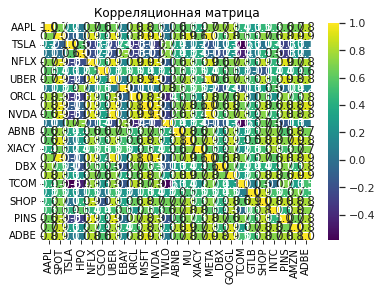

In [32]:
import seaborn as sns # heatmap в sns намного удобнее, чем в matplotlib
plt.title("Корреляционная матрица")
sns.set(rc = {'figure.figsize':(10, 10)})
sns.heatmap(df2.corr(), 
            annot=True, 
            fmt=".1f", 
            #square=True,
            linewidths=.5, 
            cmap="viridis"
           )#отображение корреляционной матрицы диаграммой

### 2.4 В соответствии с Вашим вариантом определите: <a name="task2_4"></a>

    акцию с максимальной положительной корреляцией (max)
    акцию с максимальной отрицательной корреляцией (min)
    акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none)


In [33]:
# выберем строку корреляций для AAPL,удалив корреляцию с самой собой
df_aapl = df2.corr().drop(["AAPL"], axis=1)
df_aapl = df_aapl.loc[["AAPL"]].T
df_aapl.head()

,AAPL
SPOT,0.687415
TSLA,0.248385
HPQ,0.067074
NFLX,0.701937
CSCO,0.589552


In [34]:
# максимальная корреляция
max_corr_key = df_aapl.idxmax()[0]
max_corr_key

'ADBE'

In [35]:
df_aapl.loc[[max_corr_key]]

,AAPL
ADBE,0.833129


In [36]:
# минимальная корреляция (с учетом знака)
min_corr_key = df_aapl.idxmin()[0]
min_corr_key

'TWLO'

In [37]:
# отрицательных значений для AAPL нет в heatmap
df_aapl.loc[[min_corr_key]]

,AAPL
TWLO,0.042914


In [38]:
# минимальная корреляция (без учета знака)
abs_min_corr_key = df_aapl.fillna(0).abs().idxmin()[0]
abs_min_corr_key

'TWLO'

In [39]:
df_aapl.loc[[abs_min_corr_key]]

,AAPL
TWLO,0.042914


### 2.5 Постройте диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none) <a name="task2_5"></a>

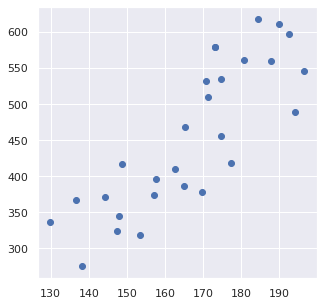

In [40]:
# диаграмма разброса с max corr
sns.set (rc = {'figure.figsize':(5, 5)})
plt.scatter (df2["AAPL"], df2[max_corr_key])

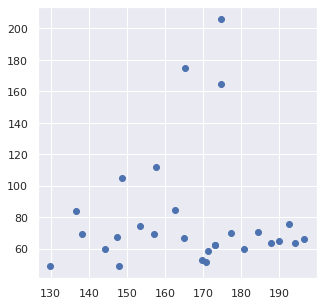

In [41]:
# диаграмма разброса с min corr (с учетом знака)
plt.scatter (df2["AAPL"], df2[min_corr_key])

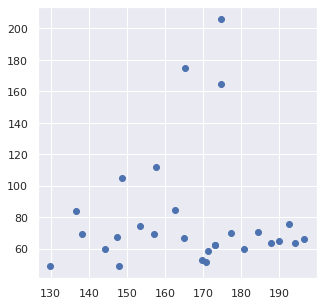

In [42]:
# диаграмма разброса с min corr (без учета знака)
plt.scatter (df2["AAPL"], df2[abs_min_corr_key])

### 2.6 Рассчитайте среднюю цену акций для каждого месяца <a name="task2_6"></a>

In [43]:
# средняя цена акций для каждого месяца
mean = df2.T.mean()
mean.name = "mean"
mean

Date
2022-01-01    154.857167
2022-02-01    140.774723
2022-03-01    145.272287
2022-04-01    115.763514
2022-05-01    112.316034
2022-06-01     99.256929
2022-07-01    114.014999
2022-08-01    107.380833
2022-09-01     94.437083
2022-10-01     97.227501
2022-11-01    100.671666
2022-12-01     92.028958
2023-01-01    108.279540
2023-02-01    108.613126
2023-03-01    120.210832
2023-04-01    115.778799
2023-05-01    131.258401
2023-06-01    145.426799
2023-07-01    153.207200
2023-08-01    152.016000
2023-09-01    141.760400
2023-10-01    140.454598
2023-11-01    159.367601
2023-12-01    164.859599
2024-01-01    174.886801
2024-02-01    189.609962
2024-03-01    196.083201
2024-03-12    196.083201
Name: mean, dtype: float64

### 2.7 Постройте графики для акций из пункта 4 и средней из пункта 6 <a name="task2_6"></a>

<AxesSubplot:title={'center':'Цены акций'}, xlabel='Date'>

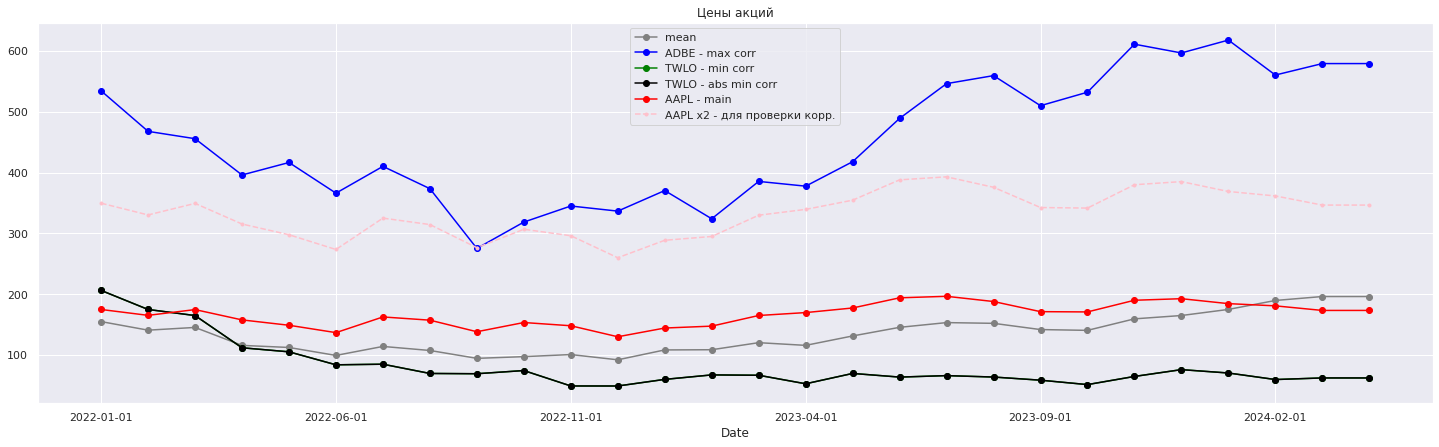

In [44]:
mean.plot(grid=1, figsize=(25,7), color='grey', marker='o', legend=True, title="Цены акций")

df2.rename(columns={max_corr_key: max_corr_key + " - max corr"})[max_corr_key + " - max corr"] \
    .plot(grid=1, figsize=(25,7), color='blue', marker='o', legend=True) 

df2.rename(columns={abs_min_corr_key: min_corr_key + " - min corr"})[min_corr_key + " - min corr"] \
    .plot(grid=1, figsize=(25,7), color='green', marker='o', legend=True)   # совпадает с abs min

df2.rename(columns={abs_min_corr_key: abs_min_corr_key + " - abs min corr"})[abs_min_corr_key + " - abs min corr"] \
    .plot(grid=1, figsize=(25,7), color='black', marker='o', legend=True)

df2.rename(columns={"AAPL": "AAPL - main"})["AAPL - main"].plot(grid=1, figsize=(25,7), 
                                                                color='red', marker='o', legend=True)

# корреляция AAPL с ADBE плохо видна в изначальном виде, отмасштабируем значение для наглядности
aapl_x_2 = df2["AAPL"]*2
aapl_x_2.name = "AAPL x2 - для проверки корр."
aapl_x_2.plot(grid=1, figsize=(25,7), color='pink', style = "--", marker='.', legend=True)